In [1]:
disable_warnings = True
if disable_warnings:
    import warnings
    warnings.filterwarnings('ignore')

import pickle
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from utils.model_utils import ExtendedLanguageModel
from utils.data_utils import AnalogiesDataLoader
from utils.plot_utils import plot_RDM
from utils.eval_utils import get_RDM, get_unique_indices, get_rule_sim_diagonal

from __future__ import print_function
from ipywidgets import interactive


DATA_DIR = 'data/ICL/results'

In [2]:
# Select Model
model_widget = interactive(lambda model_name: model_name,
                      model_name=[
                            'meta-llama/Llama-2-70b-hf',
                            'EleutherAI/gpt-j-6b'
                      ])
display(model_widget)

interactive(children=(Dropdown(description='model_name', options=('meta-llama/Llama-2-70b-hf', 'EleutherAI/gpt…

In [3]:
model_name = model_widget.children[0].value
model = ExtendedLanguageModel(model_name)
print(f"Selected model: {model_name}\n")

Selected model: meta-llama/Llama-2-70b-hf



In [4]:
results_path = f'{DATA_DIR}/{model.nickname}__{3}_n.pkl'
data = pickle.load(open(results_path, 'rb'))

In [5]:
tasks = np.repeat(list(data.keys()), len(data[list(data.keys())[0]]['completions']))
task_idx = get_unique_indices(pd.Series(tasks))

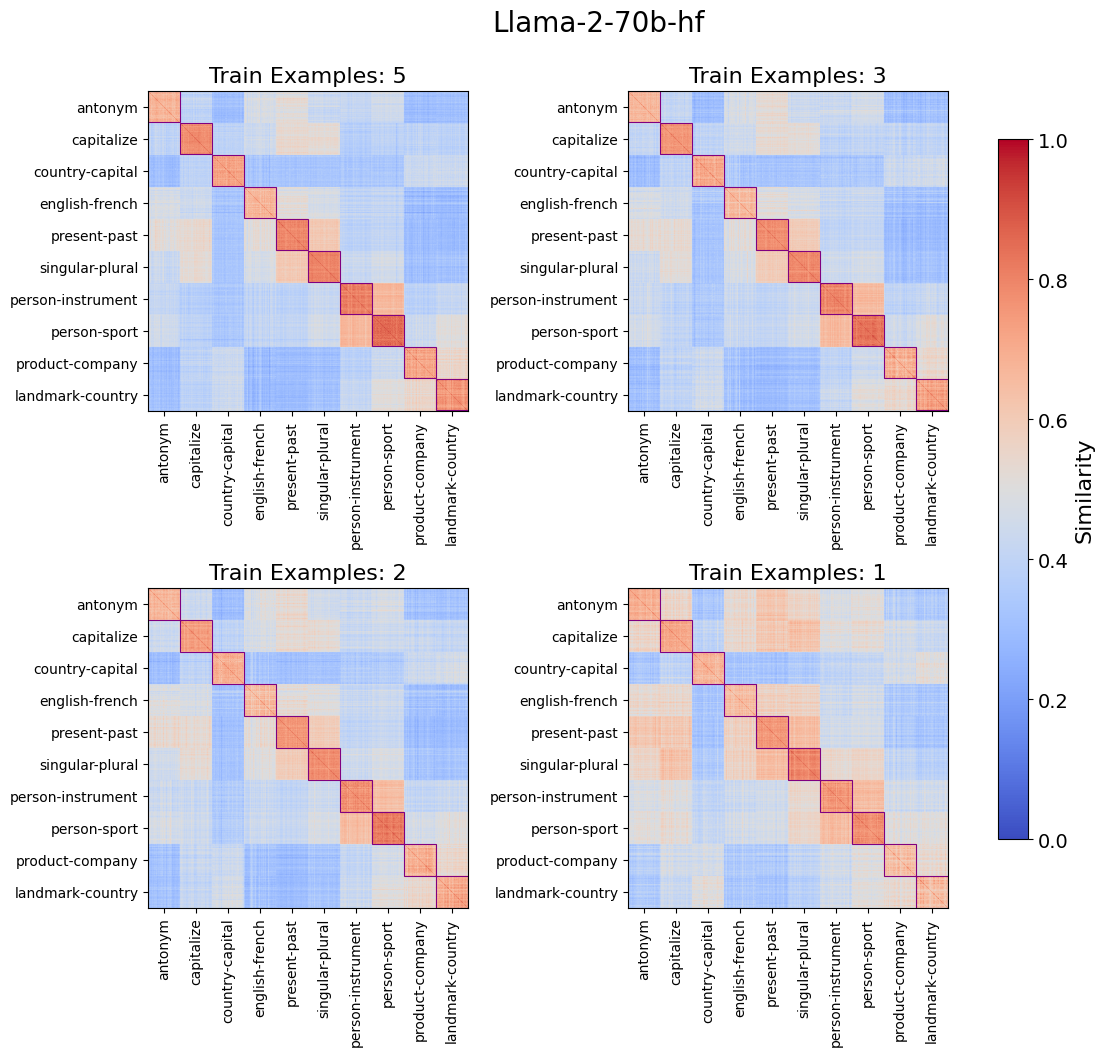

In [25]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

n_train_sizes = [5,3,2,1]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes_flat = axes.flatten()

norm = Normalize(vmin=0, vmax=1)

# Iterate over each RDM and plot it on the corresponding subplot
for idx, ax in enumerate(axes_flat):
    results_path = f'{DATA_DIR}/{model.nickname}__{n_train_sizes[idx]}_n.pkl'
    data = pickle.load(open(results_path, 'rb'))
    FVs = np.concatenate([data[dataset]['FVs'] for dataset in data.keys()])
    rdm = get_RDM(FVs)
    plot_RDM(rdm, 
             axis=ax, 
             title=f'Train Examples: {n_train_sizes[idx]}', 
             rel_indices=task_idx, 
             rel_ticks=True,
             norm=norm,
    )

# Create a colorbar
fig.subplots_adjust(right=0.85, left=0.05, bottom=0.05, top=0.93, wspace=0.5, hspace=0.3)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7]) 
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap='coolwarm'), cax=cbar_ax)
cbar.set_label('Similarity', fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.suptitle(model.nickname, fontsize=20)
plt.show()
